# Outcome Time Statistics

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
outcomes = {"White Wins": "w1-0", "Black Loses": "b1-0", "White Loses": "w0-1",
            "Black Wins": "b0-1", "White Draws": "w1/2-1/2", "Black Draws": "b1/2-1/2"}

## Outcomes to Average Time

In [2]:
average_df = pd.DataFrame(columns=["Outcome", "Average Move Time"])
average_time_dir = "OutcomeAverageTimeData"

print("Setting up initial Dataframe")
for file in os.listdir(average_time_dir):
    if "." not in file:
        with open(os.path.join(average_time_dir, file), "r") as f:
            lines = f.readlines()
            rows = [line.strip().split(",") for line in lines]
            df = pd.DataFrame(rows, columns=["Outcome", "Average Move Time"])
            average_df = pd.concat([average_df, df], ignore_index=True)
            f.close()
average_df["Outcome"] = average_df["Outcome"].astype(str)
average_df["Average Move Time"] = average_df["Average Move Time"].astype(float)
average_df = average_df[average_df["Average Move Time"] != float("inf")]
print(f"{len(average_df.index)} viable outcomes")

Setting up initial Dataframe
1073554 viable outcomes


Outcome: White Wins
Count: 264743
Average: 0.011441403558639401
Standard Deviation: 0.013658271618934872


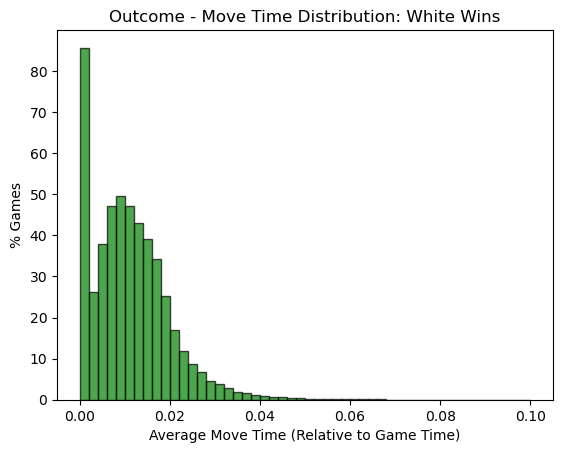

Outcome: Black Loses
Count: 264169
Average: 0.012973927215110244
Standard Deviation: 0.014998018791858164


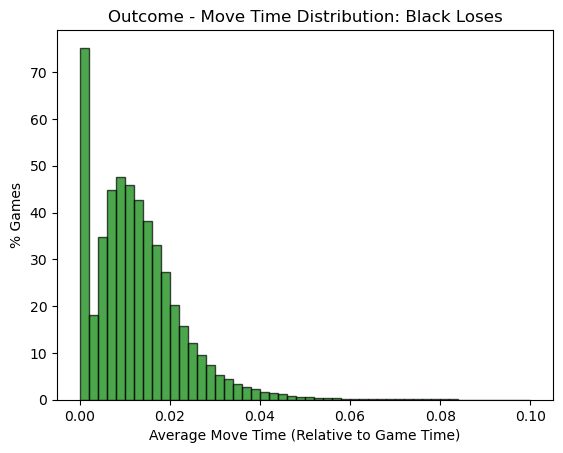

Outcome: White Loses
Count: 246591
Average: 0.012918916477827945
Standard Deviation: 0.014962166858724455


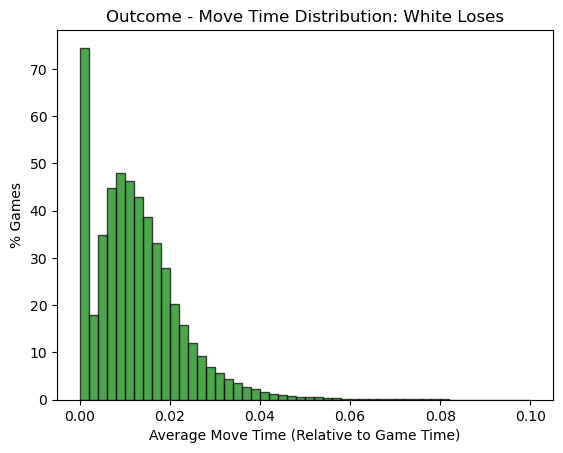

Outcome: Black Wins
Count: 246328
Average: 0.011779200079448172
Standard Deviation: 0.013419557989934378


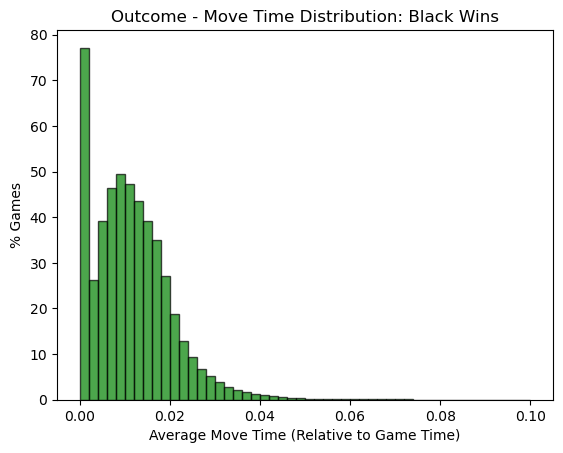

Outcome: White Draws
Count: 25867
Average: 0.011097621357957079
Standard Deviation: 0.008855746035794178


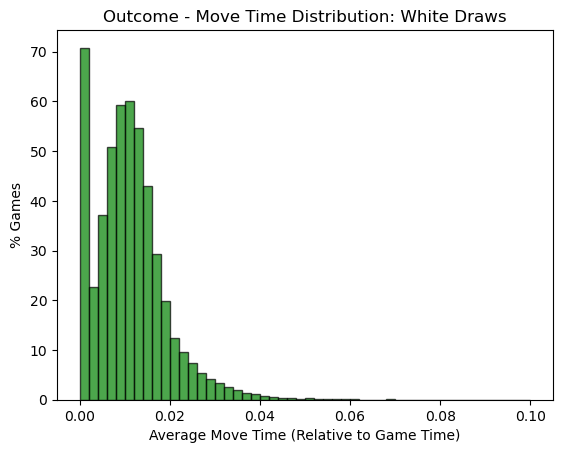

Outcome: Black Draws
Count: 25856
Average: 0.0111617176610341
Standard Deviation: 0.009700189691584928


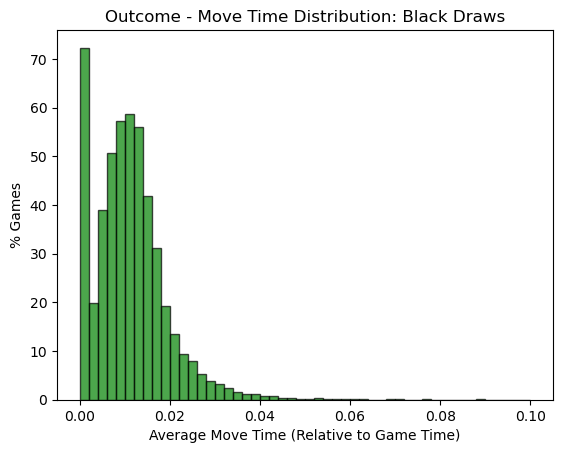

In [3]:
for outcome, code in outcomes.items():
    print(f"Outcome: {outcome}")
    df = average_df[average_df["Outcome"] == code]
    print(f"Count: {len(df.index)}")
    print(f"Average: {df['Average Move Time'].mean()}")
    print(f"Standard Deviation: {df['Average Move Time'].std()}")
    
    plt.hist(df["Average Move Time"], bins=50, range=(0.0, 0.1), density=True,
             alpha=0.7, color='green', edgecolor='black')
    plt.title(f"Outcome - Average Move Time Distribution: {outcome}")
    plt.xlabel("Average Move Time (Relative to Game Time)")
    plt.ylabel("% Games")
    plt.show()

## Outcomes to Total Time

In [4]:
total_df = pd.DataFrame(columns=["Outcome", "Total Move Time"])
total_time_dir = "OutcomeTotalTimeData"

print("Setting up initial Dataframe")
for file in os.listdir(total_time_dir):
    if "." not in file:
        with open(os.path.join(total_time_dir, file), "r") as f:
            lines = f.readlines()
            rows = [line.strip().split(",") for line in lines]
            df = pd.DataFrame(rows, columns=["Outcome", "Total Move Time"])
            total_df = pd.concat([total_df, df], ignore_index=True)
            f.close()
total_df["Outcome"] = total_df["Outcome"].astype(str)
total_df["Total Move Time"] = total_df["Total Move Time"].astype(float)
total_df = total_df[total_df["Total Move Time"] != float("inf")]
print(f"{len(total_df.index)} viable outcomes")
total_df.head()

Setting up initial Dataframe
1073573 viable outcomes


,Outcome,Total Move Time
0,b1-0,0.997058
1,b1-0,0.287924
2,b1-0,0.377872
3,b1-0,0.825798
4,b0-1,0.408370


Outcome: White Wins
Count: 264749
Average: 0.3374441040178013
Standard Deviation: 0.2689362354870367


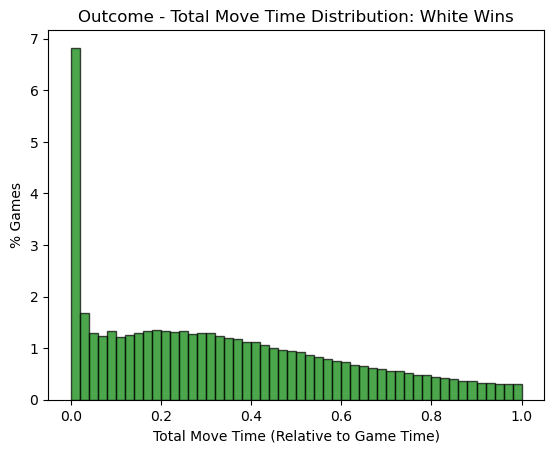

Outcome: Black Loses
Count: 264172
Average: 0.37177499137923675
Standard Deviation: 0.30348791884909904


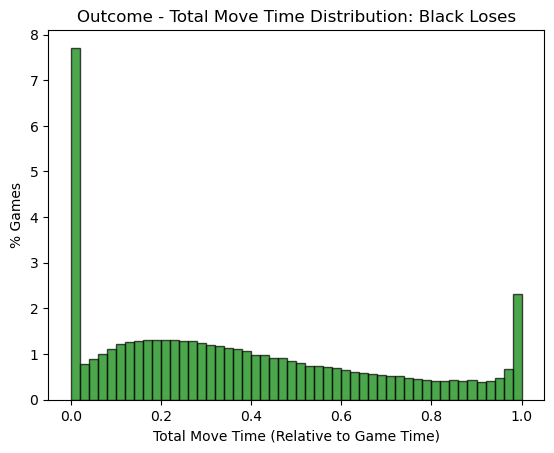

Outcome: White Loses
Count: 246595
Average: 0.38458701113546484
Standard Deviation: 0.30580419326856845


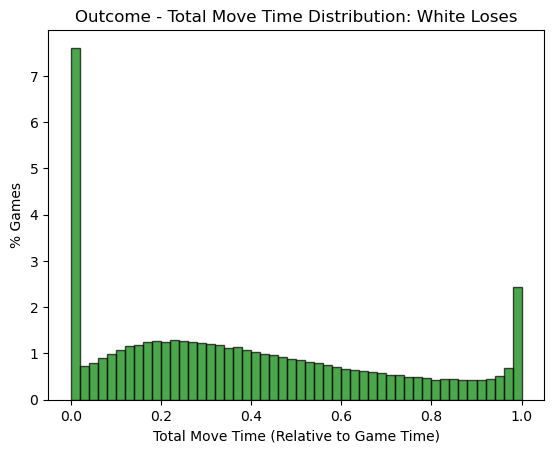

Outcome: Black Wins
Count: 246332
Average: 0.35324856019498085
Standard Deviation: 0.2694738404007895


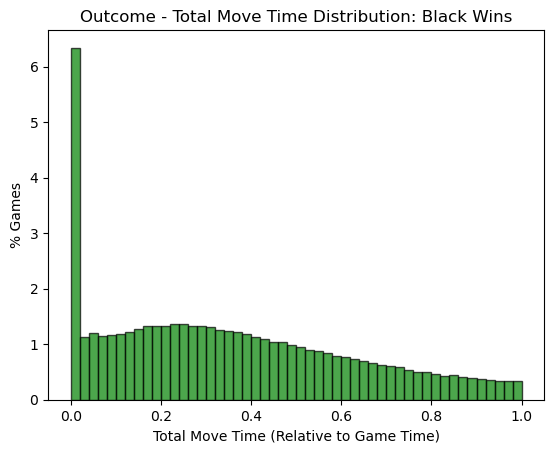

Outcome: White Draws
Count: 25868
Average: 0.5064992706089764
Standard Deviation: 0.3217743935513561


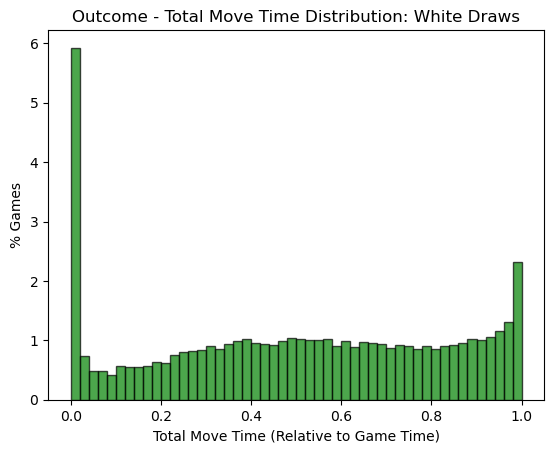

Outcome: Black Draws
Count: 25857
Average: 0.5075048218389108
Standard Deviation: 0.3211432888859226


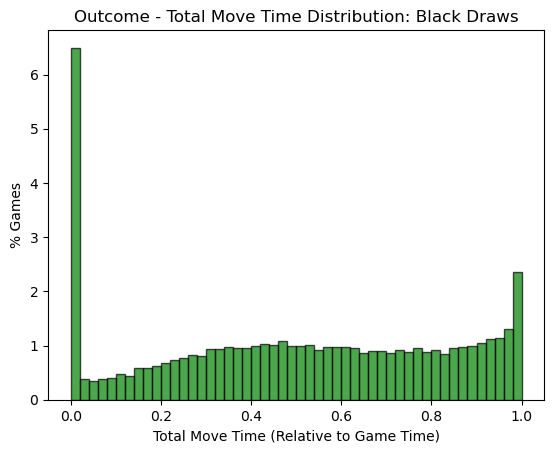

In [6]:
for outcome, code in outcomes.items():
    print(f"Outcome: {outcome}")
    df = total_df[total_df["Outcome"] == code]
    print(f"Count: {len(df.index)}")
    print(f"Average: {df['Total Move Time'].mean()}")
    print(f"Standard Deviation: {df['Total Move Time'].std()}")
    plt.hist(df["Total Move Time"], bins=50, range=(0.0, 1.0), density=True, alpha=0.7, color='green', edgecolor='black')
    plt.title(f"Outcome - Total Move Time Distribution: {outcome}")
    plt.xlabel("Total Move Time (Relative to Game Time)")
    plt.ylabel("% Games")
    plt.show()